Analyse exploratoire des données (test)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyxlsb
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


In [35]:
dfs = {}
# Boucle pour charger chaque fichier de Partie_01 à Partie_09
for i in range(1, 10):
    # Construire le chemin de fichier dynamiquement
    chemin = f"C:\\Users\\aslam\\Documents\\Stage\\12-Data\\2 - Test Pack 48V Critt M2A\\ID3186_05_Sequence_Cyclage_Partie_0{i}.xlsb"
    
    # Charger le DataFrame depuis le fichier
    df = pd.read_excel(chemin, sheet_name="Feuil1")
    
    # Enlever la colonne en double
    df.drop(df.columns[40], axis=1, inplace=True)
    
    # Stocker le DataFrame dans le dictionnaire avec une clé dynamique
    dfs[f'df{i}'] = df

In [36]:
for key in dfs.keys():
    # Remonter toutes les lignes dans le DataFrame actuel
    dfs[key] = dfs[key].shift(-1)
    
    # Supprimer la dernière ligne qui est devenue redondante après le décalage
    dfs[key].drop(dfs[key].index[-1], inplace=True)
    
    # Réinitialiser les index
    dfs[key].reset_index(drop=True, inplace=True)
    
    # Convertir toutes les colonnes en float
    dfs[key] = dfs[key].astype(float)


In [33]:
dfs['df1'].head()

,t,CycleCnt01,BMS_Tension_A,BMS_Tension_B,BMS_Mode_Ctrl,Phase_Test,Etat_step,SysDate,SysTime,Step.Time,...,C8_CyclingStatus,C9_CyclingStatus,C10_CyclingStatus,C11_CyclingStatus,C12_CyclingStatus,C13_CyclingStatus,C14_CyclingStatus,C15_CyclingStatus,Discharge_diff,Charge_diff
0,0.000,1.0,3.299,0.0,1.0,0.0,0.0,20220615.0,154118.0,0.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.001,1.0,3.299,0.0,1.0,0.0,0.0,20220615.0,154118.0,0.001,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.002,1.0,3.299,0.0,1.0,1.0,0.0,20220615.0,154118.0,0.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.003,1.0,3.299,0.0,1.0,1.0,0.0,20220615.0,154118.0,0.001,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.004,1.0,3.299,0.0,1.0,1.0,0.0,20220615.0,154118.0,0.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [34]:
dfs['df1'].describe()

,t,CycleCnt01,BMS_Tension_A,BMS_Tension_B,BMS_Mode_Ctrl,Phase_Test,Etat_step,SysDate,SysTime,Step.Time,...,C8_CyclingStatus,C9_CyclingStatus,C10_CyclingStatus,C11_CyclingStatus,C12_CyclingStatus,C13_CyclingStatus,C14_CyclingStatus,C15_CyclingStatus,Discharge_diff,Charge_diff
count,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,2.083030e+05,208303.000000,208303.000000,...,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,46680.000000,159147.000000
mean,104.151000,26.795980,2.560762,0.779707,1.248503,2.478447,1.212210,2.022062e+07,118746.222066,1246.538686,...,0.938037,0.946568,1.178581,0.741674,1.020595,1.031229,1.347244,0.731257,0.002759,0.000829
std,60.132041,15.238275,1.374660,1.401379,0.459790,0.867672,0.436979,1.220609e+00,68896.936407,884.214584,...,1.360000,1.404422,2.340424,0.437715,1.629750,1.666550,2.746833,0.443307,0.000446,0.000376
min,0.000000,1.000000,-0.012000,-0.001000,1.000000,0.000000,0.000000,2.022062e+07,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.075500,14.000000,3.299000,0.000000,1.000000,2.000000,1.000000,2.022062e+07,61221.000000,482.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.003000,0.001000
50%,104.151000,27.000000,3.299000,0.001000,1.000000,2.000000,1.000000,2.022062e+07,120525.000000,1035.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.003000,0.001000
75%,156.226500,40.000000,3.299000,0.001000,1.000000,2.000000,1.000000,2.022062e+07,174455.000000,2002.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.003000,0.001000
max,208.302000,53.000000,3.300000,3.319000,3.000000,5.000000,2.000000,2.022062e+07,235958.000000,3600.001000,...,15.000000,15.000000,15.000000,1.000000,15.000000,15.000000,15.000000,1.000000,0.003000,0.001000


### Le voltage en fonction du temps

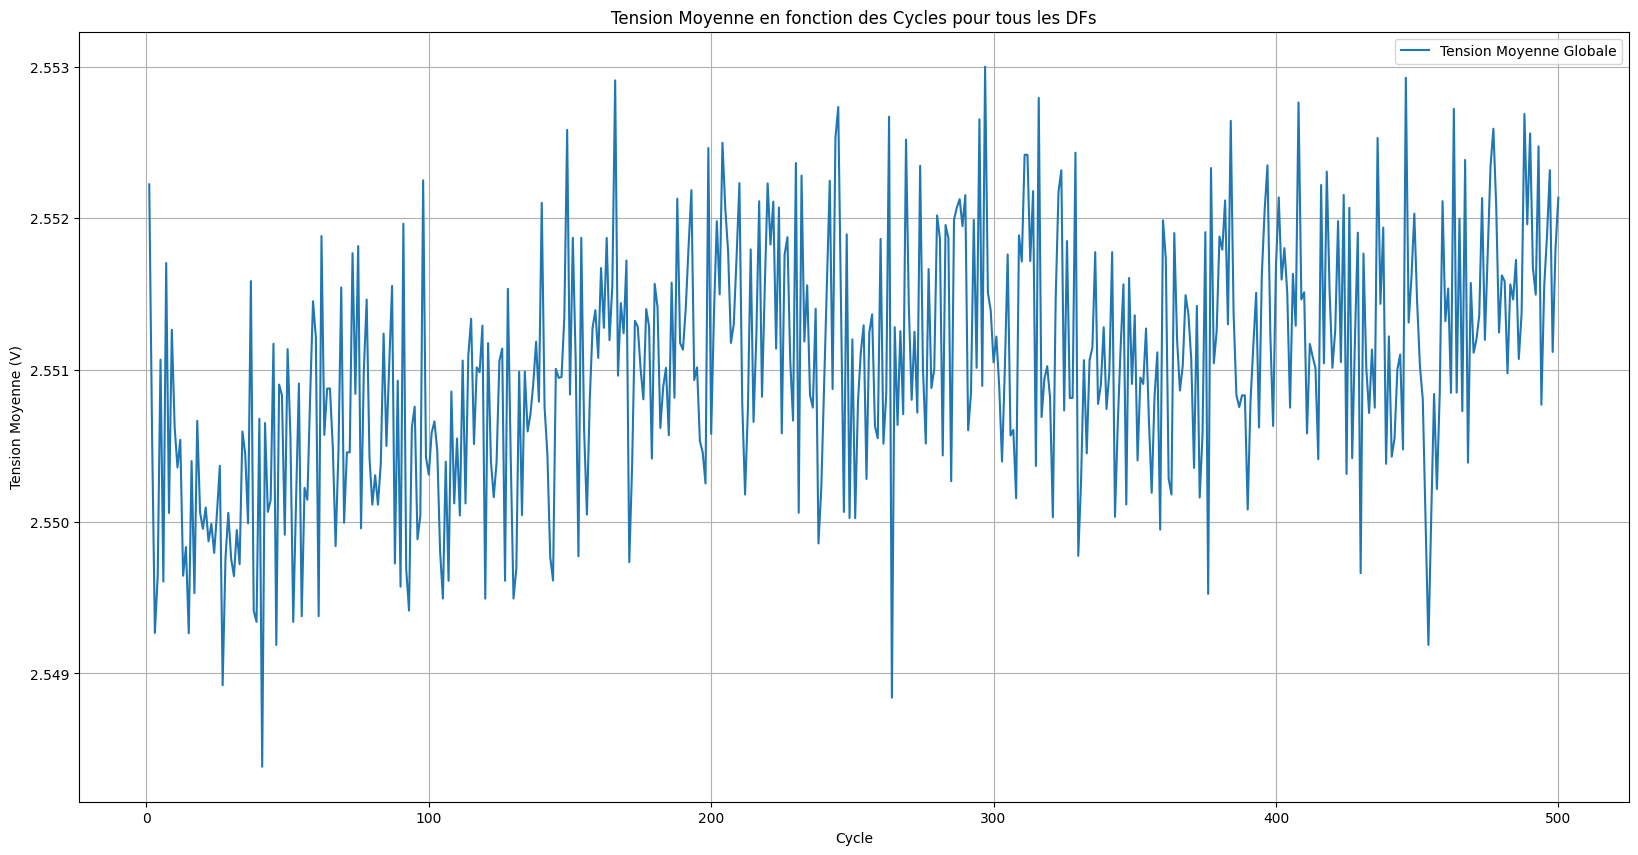

In [37]:
# Initialiser un DataFrame vide pour rassembler toutes les données de tension
df_tension_tous = pd.DataFrame()

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs et concaténer les données de tension
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Extraire les données de tension et de cycle
        df_temp = dfs[df_key][['CycleCnt01', 'BMS_Tension_A']].copy()
        
        # Ajouter les données de ce DataFrame au DataFrame global
        df_tension_tous = pd.concat([df_tension_tous, df_temp])

# Calculer la tension moyenne pour chaque cycle à travers tous les DataFrames
tension_moyenne_par_cycle_global = df_tension_tous.groupby('CycleCnt01')['BMS_Tension_A'].mean()

# Tracer la tension moyenne globale pour chaque cycle
plt.figure(figsize=(20, 10))
plt.plot(tension_moyenne_par_cycle_global.index, tension_moyenne_par_cycle_global.values, label='Tension Moyenne Globale')

plt.title('Tension Moyenne en fonction des Cycles pour tous les DFs')
plt.xlabel('Cycle')
plt.ylabel('Tension Moyenne (V)')
plt.legend()
plt.grid(True)
plt.show()

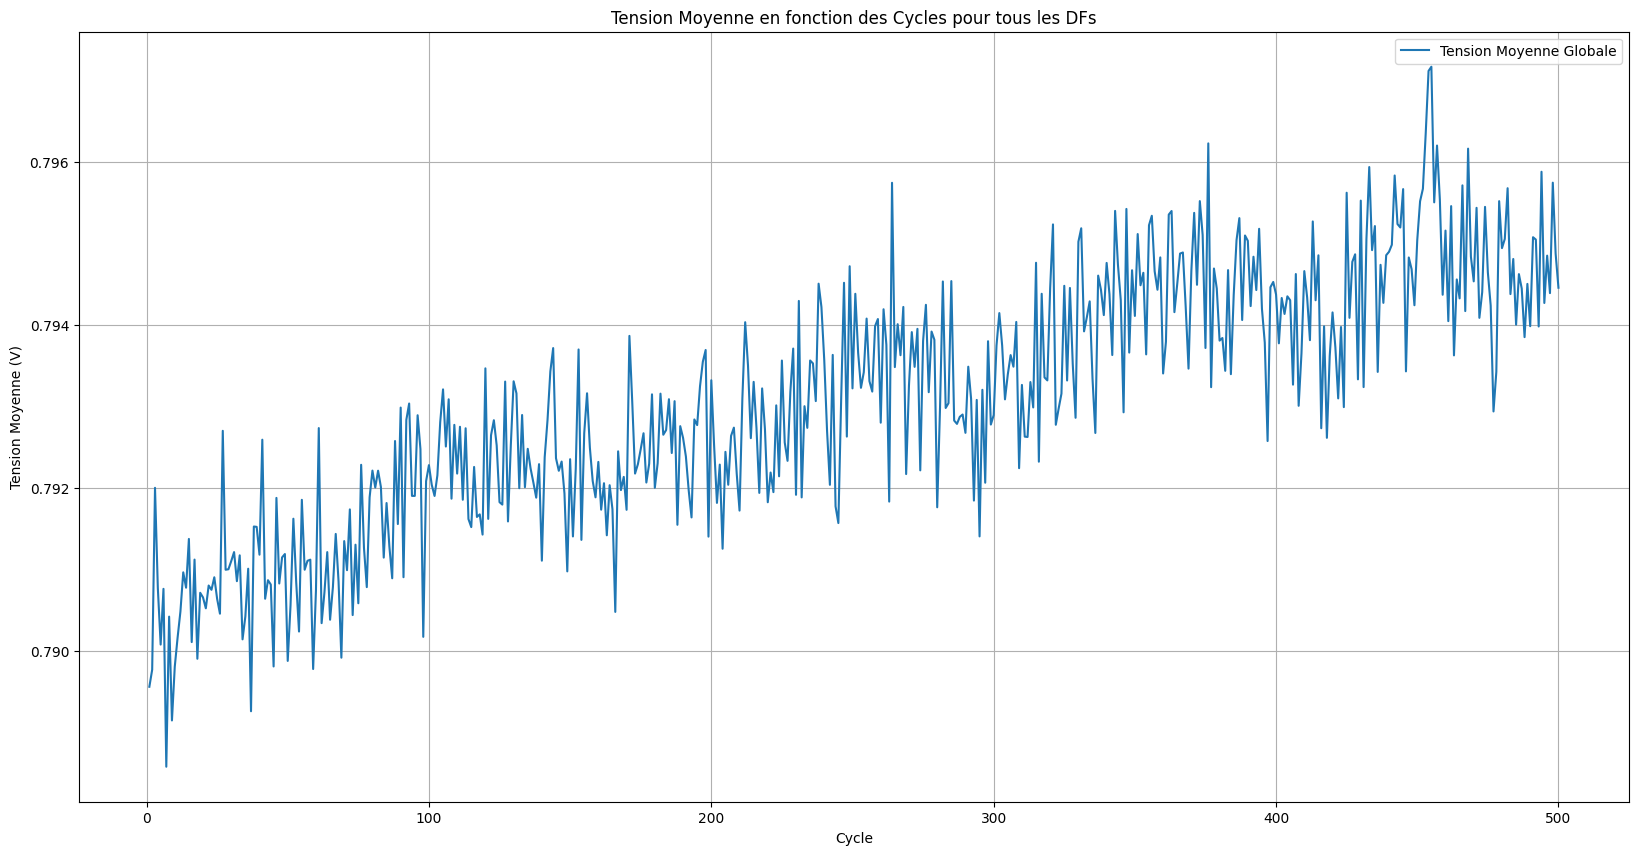

In [38]:
# Initialiser un DataFrame vide pour rassembler toutes les données de tension
df_tension_tous = pd.DataFrame()

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs et concaténer les données de tension
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Extraire les données de tension et de cycle
        df_temp = dfs[df_key][['CycleCnt01', 'BMS_Tension_B']].copy()
        
        # Ajouter les données de ce DataFrame au DataFrame global
        df_tension_tous = pd.concat([df_tension_tous, df_temp])

# Calculer la tension moyenne pour chaque cycle à travers tous les DataFrames
tension_moyenne_par_cycle_global = df_tension_tous.groupby('CycleCnt01')['BMS_Tension_B'].mean()

# Tracer la tension moyenne globale pour chaque cycle
plt.figure(figsize=(20, 10))
plt.plot(tension_moyenne_par_cycle_global.index, tension_moyenne_par_cycle_global.values, label='Tension Moyenne Globale')

plt.title('Tension Moyenne en fonction des Cycles pour tous les DFs')
plt.xlabel('Cycle')
plt.ylabel('Tension Moyenne (V)')
plt.legend()
plt.grid(True)
plt.show()

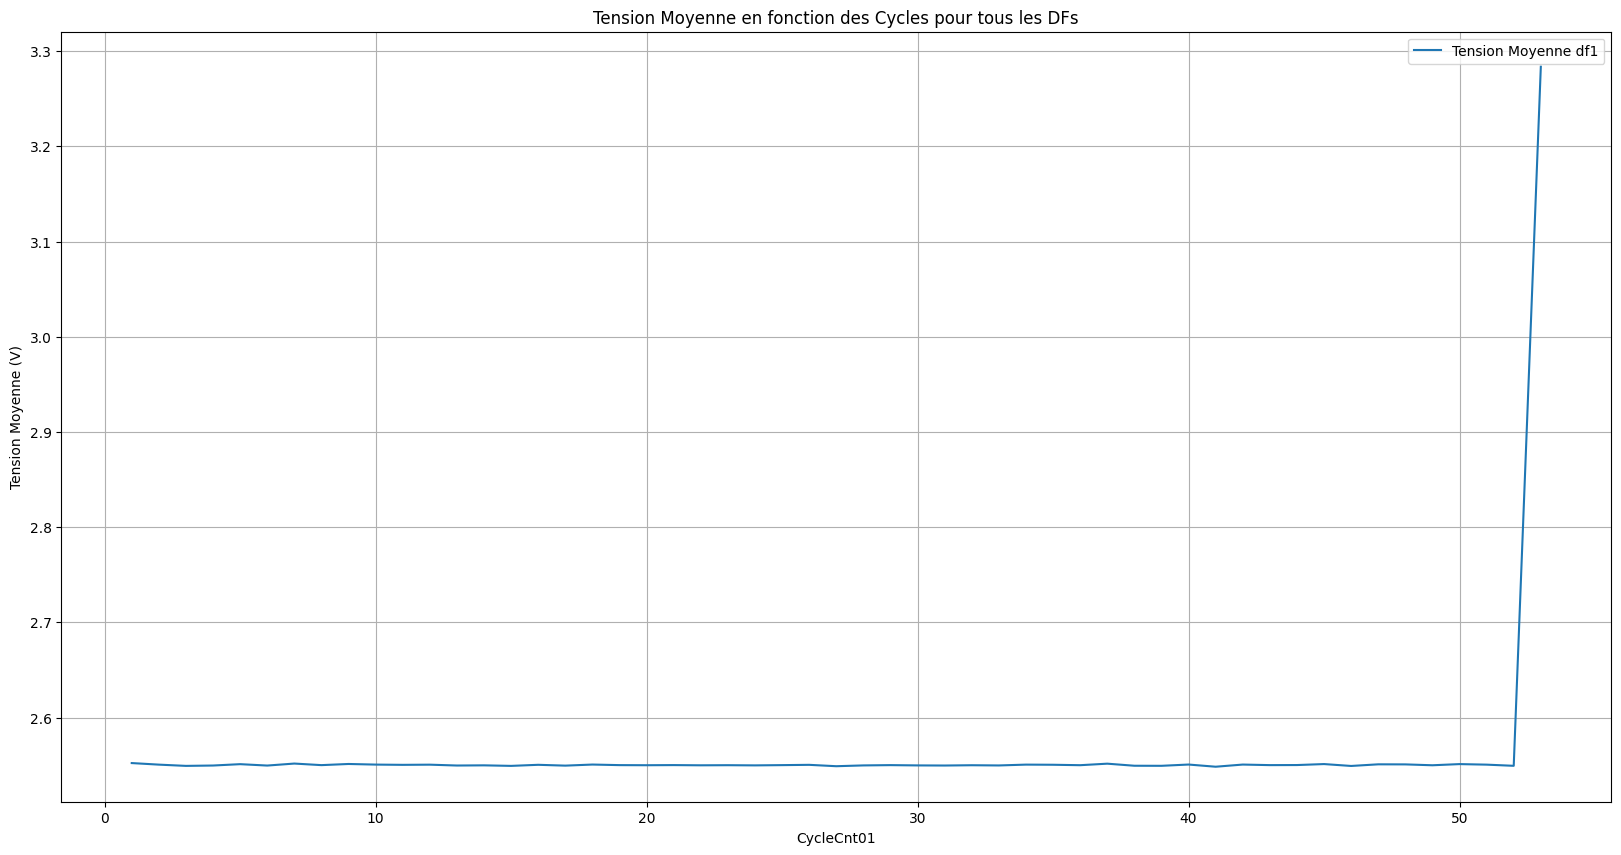

In [6]:
plt.figure(figsize=(20, 10))


df_key = f'df{1}'
if df_key in dfs:  
        # Calculer la tension moyenne pour chaque cycle
    tension_moyenne_par_cycle = dfs[df_key].groupby('CycleCnt01')['BMS_Tension_A'].mean()
        
    # Tracer la tension moyenne pour chaque cycle
    plt.plot(tension_moyenne_par_cycle.index, tension_moyenne_par_cycle.values, label=f'Tension Moyenne {df_key}')

plt.title('Tension Moyenne en fonction des Cycles pour tous les DFs')
plt.xlabel('CycleCnt01')
plt.ylabel('Tension Moyenne (V)')

plt.legend()
plt.grid(True)
plt.show()

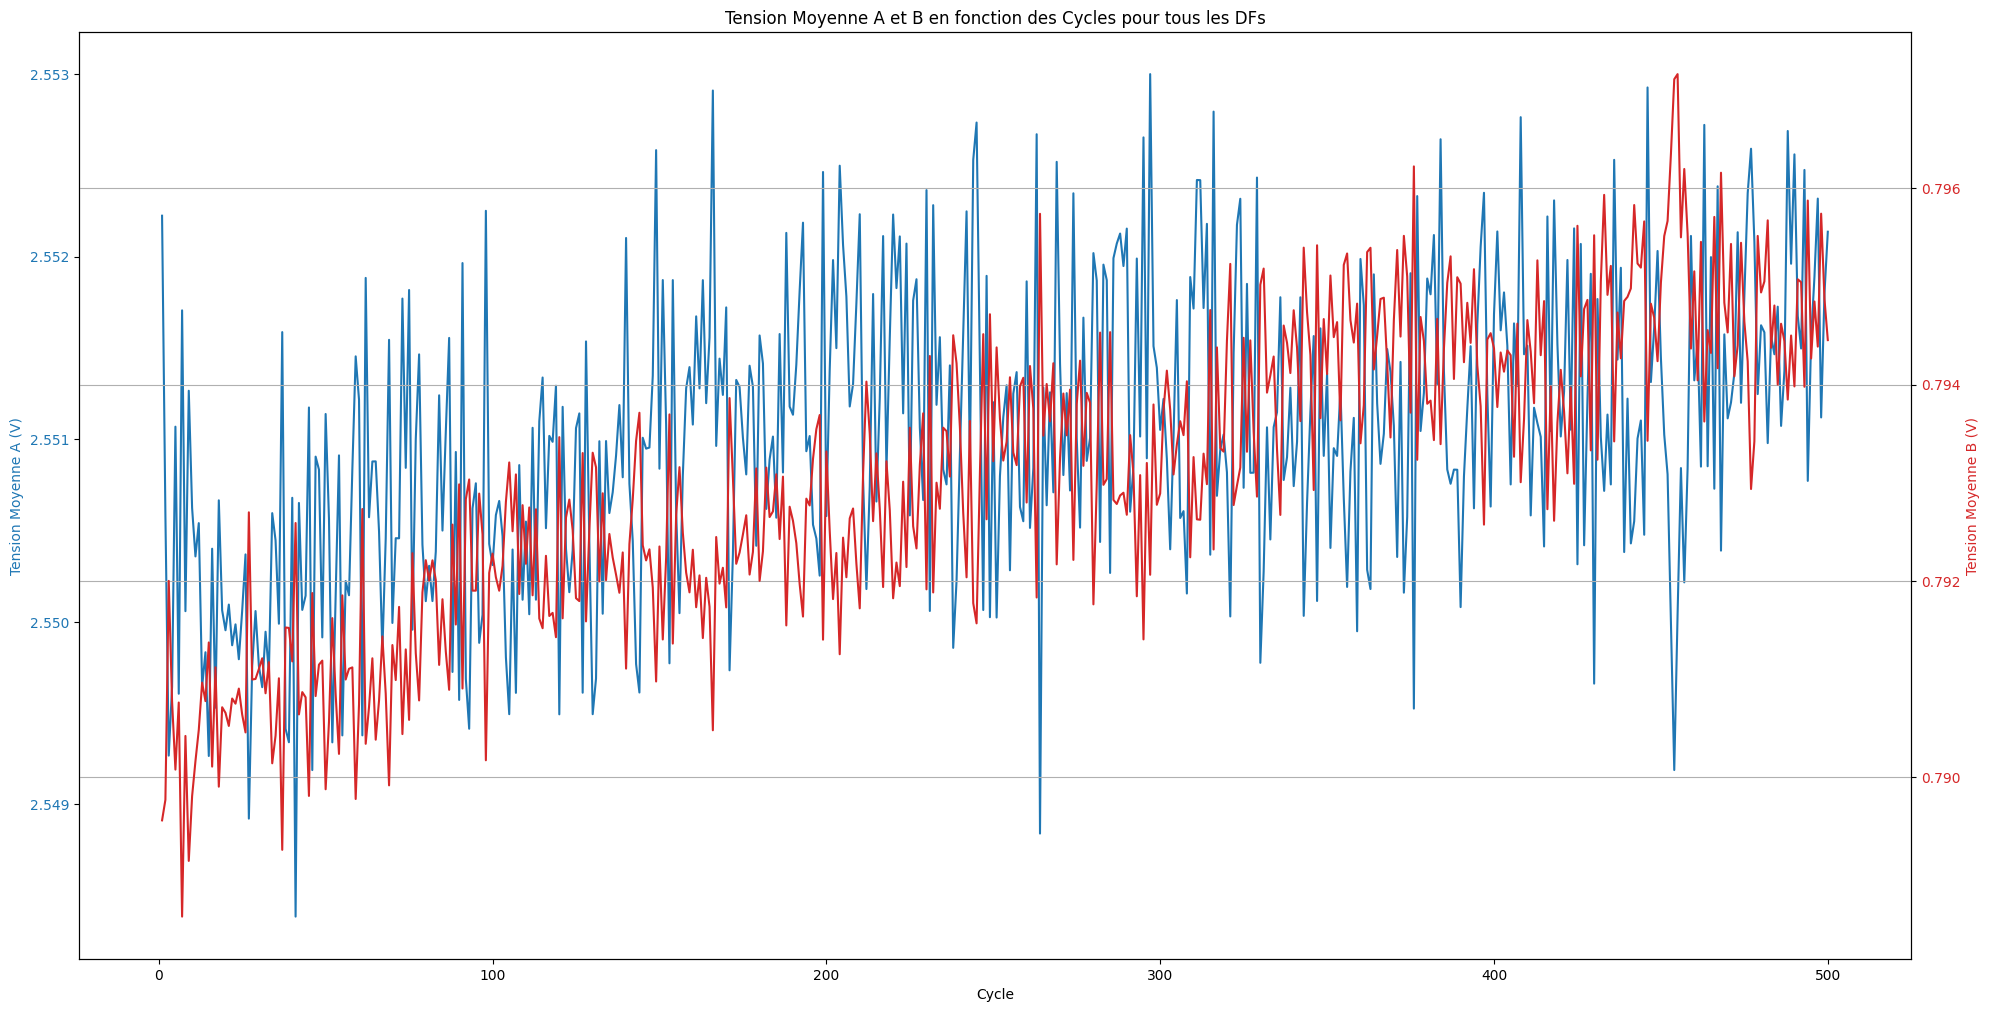

In [42]:
# Initialiser les DataFrames pour rassembler toutes les données de tension A et B
df_tension_tous_A = pd.DataFrame()
df_tension_tous_B = pd.DataFrame()

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Extraire les données de tension A et de cycle
        df_temp_A = dfs[df_key][['CycleCnt01', 'BMS_Tension_A']].copy()
        # Ajouter les données de ce DataFrame au DataFrame global A
        df_tension_tous_A = pd.concat([df_tension_tous_A, df_temp_A])
        
        # Extraire les données de tension B et de cycle
        df_temp_B = dfs[df_key][['CycleCnt01', 'BMS_Tension_B']].copy()
        # Ajouter les données de ce DataFrame au DataFrame global B
        df_tension_tous_B = pd.concat([df_tension_tous_B, df_temp_B])

# Calculer la tension moyenne pour chaque cycle à travers tous les DataFrames pour A et B
tension_moyenne_par_cycle_global_A = df_tension_tous_A.groupby('CycleCnt01')['BMS_Tension_A'].mean()
tension_moyenne_par_cycle_global_B = df_tension_tous_B.groupby('CycleCnt01')['BMS_Tension_B'].mean()

# Créer le graphique avec deux axes des ordonnées
fig, ax1 = plt.subplots(figsize=(20, 10))

# Axe des ordonnées de gauche pour la tension A
color = 'tab:blue'
ax1.set_xlabel('Cycle')
ax1.set_ylabel('Tension Moyenne A (V)', color=color)
ax1.plot(tension_moyenne_par_cycle_global_A.index, tension_moyenne_par_cycle_global_A.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Axe des ordonnées de droite pour la tension B
ax2 = ax1.twinx()  # instancier un second axe des ordonnées partageant le même axe des x
color = 'tab:red'
ax2.set_ylabel('Tension Moyenne B (V)', color=color)  
ax2.plot(tension_moyenne_par_cycle_global_B.index, tension_moyenne_par_cycle_global_B.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Autres configurations du graphique
fig.tight_layout()  # pour que le deuxième axe des y ne soit pas coupé
plt.title('Tension Moyenne A et B en fonction des Cycles pour tous les DFs')
plt.grid(True)
plt.show()

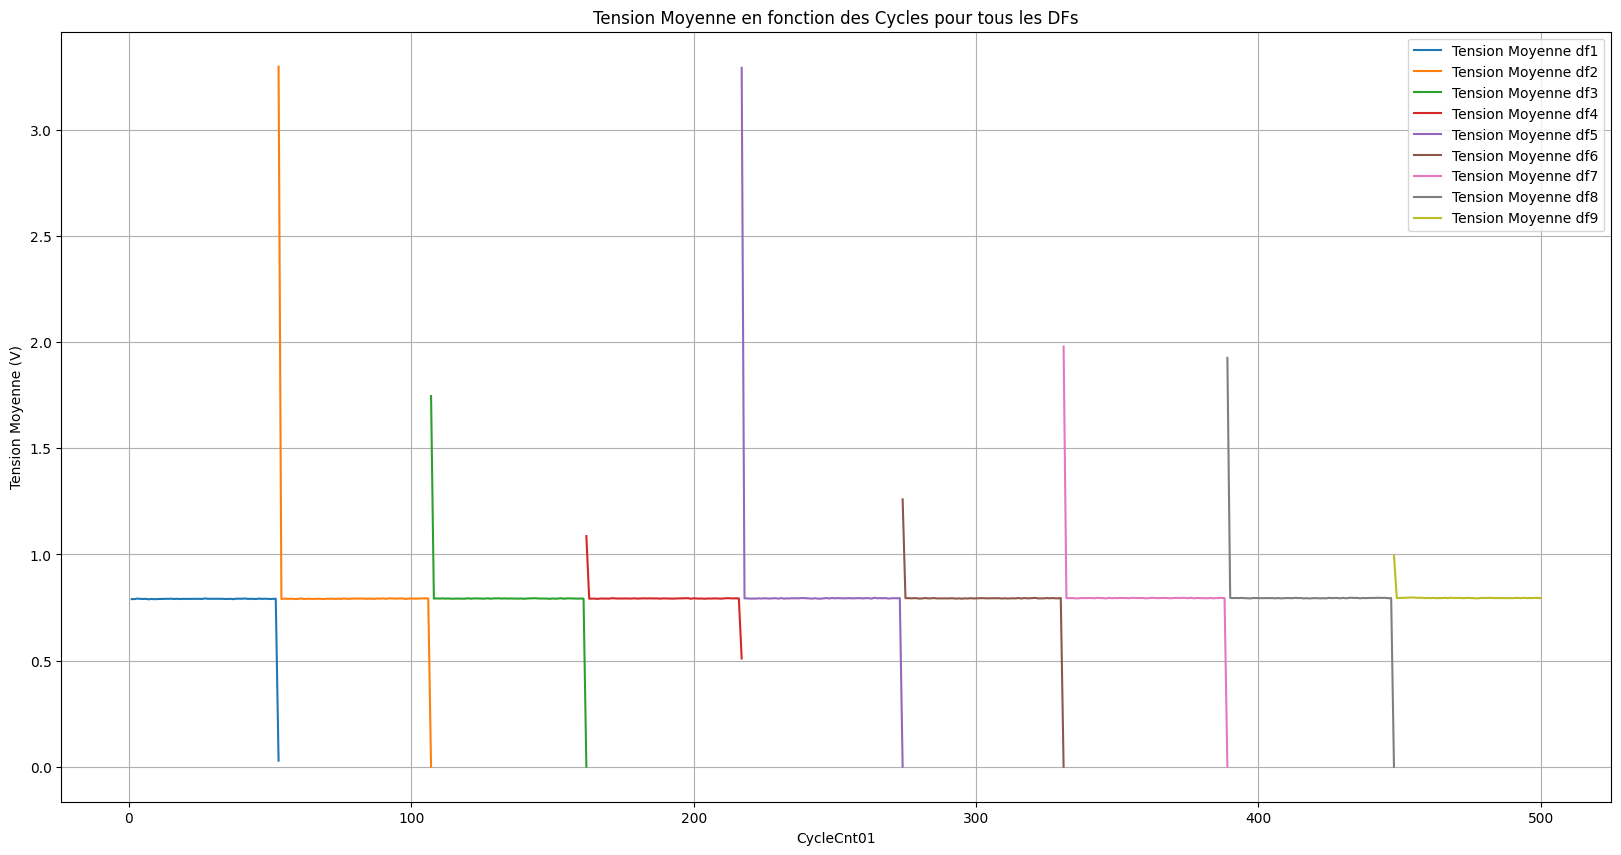

In [36]:
plt.figure(figsize=(20, 10))

# Boucle pour accéder à chaque DataFrame stocké dans le dictionnaire dfs
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:  
        # Calculer la tension moyenne pour chaque cycle
        tension_moyenne_par_cycle = dfs[df_key].groupby('CycleCnt01')['BMS_Tension_B'].mean()
        
        # Tracer la tension moyenne pour chaque cycle
        plt.plot(tension_moyenne_par_cycle.index, tension_moyenne_par_cycle.values, label=f'Tension Moyenne {df_key}')

plt.title('Tension Moyenne en fonction des Cycles pour tous les DFs')
plt.xlabel('CycleCnt01')
plt.ylabel('Tension Moyenne (V)')

plt.legend()
plt.grid(True)
plt.show()

### Test pour le SOH

$ SOH (\%) = \frac{Capacité\_résiduelle}{Capacité\_nominale} \times 100 $


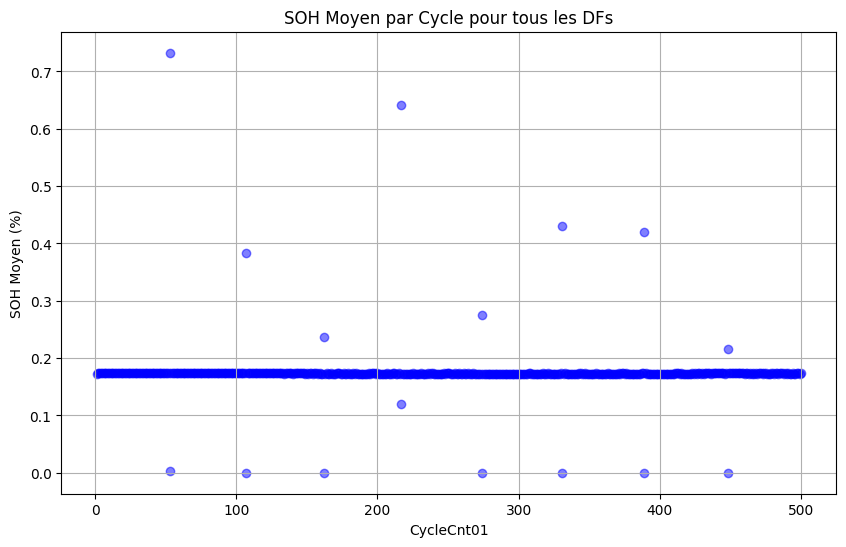

In [7]:
# Initialisation des listes pour stocker les données agrégées
cycles_tous = []
soh_moyen_tous = []

# Capacité nominale maximale de la batterie (en Wh)
capacite_nominale_maximale_Wh = 15.5

# Boucle pour calculer le SOH moyen pour chaque cycle dans tous les DataFrames
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:  
        # Assurez-vous que 'Wh_Discharge' est correctement calculé ou ajusté avant de continuer
        
        # Calculer la différence de 'Wh_Discharge' pour obtenir 'Discharge'
        dfs[df_key]['Discharge'] = dfs[df_key]['Wh_Discharge'].diff().fillna(0)
        
        # Calculer le SoH en utilisant 'Discharge'
        dfs[df_key]['SOH'] = (dfs[df_key]['Discharge'] / capacite_nominale_maximale_Wh) * 100
        
        # Calculer la moyenne du SOH pour chaque cycle
        soh_moyen_par_cycle = dfs[df_key].groupby('CycleCnt01')['SOH'].mean()
        
        # Agréger les données pour le tracé
        cycles_tous.extend(soh_moyen_par_cycle.index.tolist())
        soh_moyen_tous.extend(soh_moyen_par_cycle.values.tolist())

# Tracer le SOH moyen pour tous les cycles et DataFrames sur un seul graphique
plt.figure(figsize=(10, 6))
plt.scatter(cycles_tous, soh_moyen_tous, color='blue', alpha=0.5)
plt.title('SOH Moyen par Cycle pour tous les DFs')
plt.xlabel('CycleCnt01')
plt.ylabel('SOH Moyen (%)')
plt.grid(True)
plt.show()

C:\Users\aslam\AppData\Local\Temp\ipykernel_10532\1704609168.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decharge['Ah_Discharge1'] = df_decharge['Ah_Discharge'].diff().fillna(0)
C:\Users\aslam\AppData\Local\Temp\ipykernel_10532\1704609168.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decharge['SOH'] = (df_decharge['Ah_Discharge1'] / capacite_nominale_maximale_Ah) * 100
C:\Users\aslam\AppData\Local\Temp\ipykernel_10532\1704609168.py:16: SettingWithCopyWarning: 
A value is trying to be s

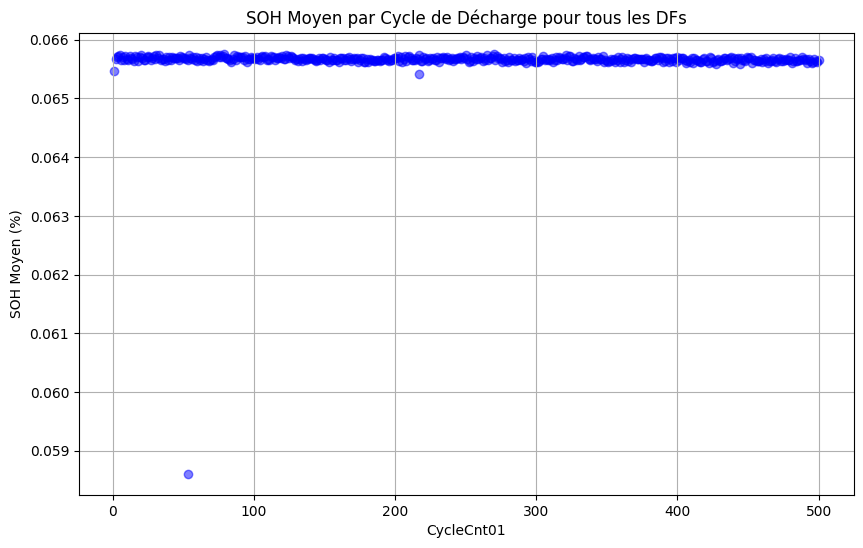

In [9]:
# Initialisation des listes pour stocker les données agrégées
cycles_tous = []
soh_moyen_tous = []

# Capacité nominale maximale de la batterie (en Wh)
capacite_nominale_maximale_Ah = 4.2

# Boucle pour calculer le SOH moyen pour chaque cycle de décharge dans tous les DataFrames
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:  
        # Sélectionner uniquement les lignes correspondant aux phases de décharge (Etat_step == 2)
        df_decharge = dfs[df_key][dfs[df_key]['Etat_step'] == 2]
        
        # Calculer la différence de 'Wh_Discharge' pour obtenir 'Discharge'
        df_decharge['Ah_Discharge1'] = df_decharge['Ah_Discharge'].diff().fillna(0)
        
        # Calculer le SoH en utilisant 'Discharge'
        df_decharge['SOH'] = (df_decharge['Ah_Discharge1'] / capacite_nominale_maximale_Ah) * 100
        
        # Calculer la moyenne du SOH pour chaque cycle de décharge
        soh_moyen_par_cycle = df_decharge.groupby('CycleCnt01')['SOH'].mean()
        
        # Agréger les données pour le tracé
        cycles_tous.extend(soh_moyen_par_cycle.index.tolist())
        soh_moyen_tous.extend(soh_moyen_par_cycle.values.tolist())

# Tracer le SOH moyen pour tous les cycles de décharge et DataFrames sur un seul graphique
plt.figure(figsize=(10, 6))
plt.scatter(cycles_tous, soh_moyen_tous, color='blue', alpha=0.5)
plt.title('SOH Moyen par Cycle de Décharge pour tous les DFs')
plt.xlabel('CycleCnt01')
plt.ylabel('SOH Moyen (%)')
plt.grid(True)
plt.show()

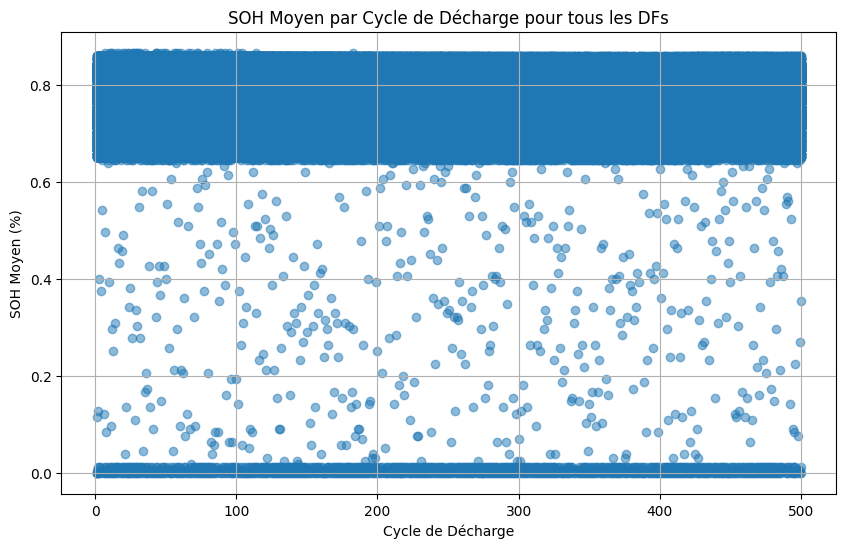

In [14]:
# Initialisation des listes pour stocker les données agrégées de tous les DataFrames
cycles_tous = []
soh_moyen_tous = []

# Boucle pour calculer le SOH moyen pour chaque cycle de décharge dans tous les DataFrames
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs: 
        # Filtrer pour obtenir les données où la batterie se décharge
        df_discharge = dfs[df_key][dfs[df_key]['Etat_step'] == 2].copy()

        # Calculer la différence d'énergie déchargée à chaque instant t
        df_discharge['QDischarge_diff'] = df_discharge['Wh_Discharge'].diff().fillna(0)

        # Si c'est le premier DataFrame, définir la capacité initiale de décharge
        if i == 1:
            capacite_initiale = df_discharge.loc[df_discharge['QDischarge_diff'] > 0, 'QDischarge_diff'].iloc[0]

        # Calculer le SOH pour chaque cycle de décharge
        df_discharge['SOH'] = (df_discharge['QDischarge_diff'] / capacite_initiale) * 100

        # Agréger les données pour le tracé
        cycles_tous.extend(df_discharge['CycleCnt01'].tolist())
        soh_moyen_tous.extend(df_discharge['SOH'].tolist())

# Tracer le SOH moyen pour tous les cycles de décharge et DataFrames sur un seul graphique
plt.figure(figsize=(10, 6))
plt.scatter(cycles_tous, soh_moyen_tous, alpha=0.5)
plt.title('SOH Moyen par Cycle de Décharge pour tous les DFs')
plt.xlabel('Cycle de Décharge')
plt.ylabel('SOH Moyen (%)')
plt.grid(True)
plt.show()

In [7]:
# Filtrer pour obtenir les données où la batterie se décharge
df_discharge = df[df['Etat_step'] == 2]

# Calculer la différence d'énergie déchargée à chaque instant t
df_discharge['QDischarge_diff'] = df_discharge['Wh_Discharge'].diff().fillna(0)

# Ignorer les premiers cycles jusqu'à ce que la première décharge complète soit atteinte (supposons que ce soit le premier cycle)
# Cela suppose que le cycle de décharge commence à l'index 0 après le filtrage
QDischarge_first_cycle = df_discharge['QDischarge_diff'].iloc[0]

# Calculer le SOH pour chaque cycle de décharge
df_discharge['SOH'] = (df_discharge['QDischarge_diff'] / QDischarge_first_cycle) * 100

df_discharge = df_discharge.reset_index(drop=True)

C:\Users\aslam\AppData\Local\Temp\ipykernel_19316\2200682856.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_discharge['QDischarge_diff'] = df_discharge['Wh_Discharge'].diff().fillna(0)
C:\Users\aslam\AppData\Local\Temp\ipykernel_19316\2200682856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discharge['QDischarge_diff'] = df_discharge['Wh_Discharge'].diff().fillna(0)
C:\Users\aslam\AppData\Local\Temp\ipykernel_19316\2200682856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

### Test pour le SOC


In [31]:

# Nous allons simuler cela sur une période de 10 heures.
n=len(df['t'])
# Initialisation de SoC à 100% pour l'exemple
SoC = np.zeros(n)
SoC[0] = 100  # Le premier élément représente le SoC initial.

# Intégration numérique pour calculer le SoC
for i in range(1, n):
    dt = (df['t'][i] - df['t'][i - 1]) / 3600.0  # Convertir le temps écoulé en heures
    if df['Etat_step'][i] == 1:
        # Utiliser 'Ah_Discharge' comme le courant de décharge, avec un signe négatif
        dSoC = (-df['Ah_Discharge'][i] * dt) / C_bat * 100
    else:
        # Utiliser 'Ah_Charge' comme le courant de charge
        dSoC = (df['Ah_Charge'][i] * dt) / C_bat * 100
    SoC[i] = SoC[i - 1] + dSoC



# Création d'un DataFrame pour la visualisation
df_soc = pd.DataFrame({'Time (h)': df['t'], 'SoC (%)': SoC})

# Tracer le SoC en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df_soc['Time (h)'], df_soc['SoC (%)'], color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('State of Charge (SoC) [%]')
plt.title('State of Charge (SoC) over Time')
plt.grid(True)
plt.show()

df_soc  # Montrer le DataFrame avec les valeurs calculées de SoC

TypeError: unsupported operand type(s) for -: 'float' and 'str'

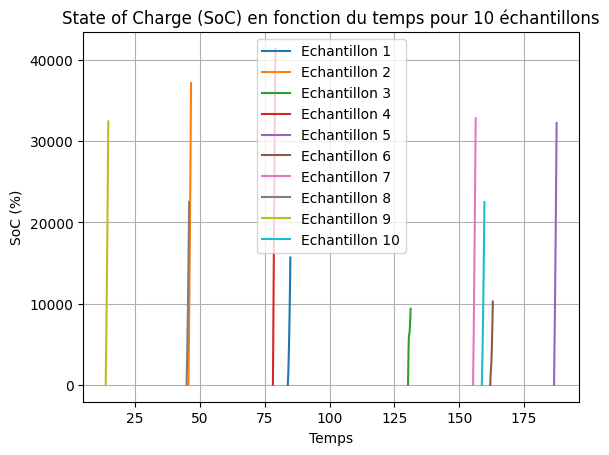

In [162]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # Ah

# Générer 10 échantillons aléatoires de taille 1000
nb_echantillons = 10
taille_echantillon = 1000
indices_aleatoires = [np.random.randint(0, len(df)-taille_echantillon) for _ in range(nb_echantillons)]
echantillons = [df.iloc[idx:idx+taille_echantillon].copy() for idx in indices_aleatoires]

# Calculer et tracer le SoC en fonction du temps pour chaque échantillon
for i, echantillon in enumerate(echantillons):
    echantillon['charge_cumulee'] = echantillon['Ah'].cumsum()
    echantillon['soc'] = (echantillon['charge_cumulee'] / capacite_nominale_maximale) * 100
    
    # Tracer le SoC en fonction du temps pour cet échantillon
    plt.plot(echantillon['t'], echantillon['soc'], label=f'Echantillon {i+1}')

plt.title('State of Charge (SoC) en fonction du temps pour 10 échantillons')
plt.xlabel('Temps')
plt.ylabel('SoC (%)')
plt.legend()
plt.grid(True)
plt.show()

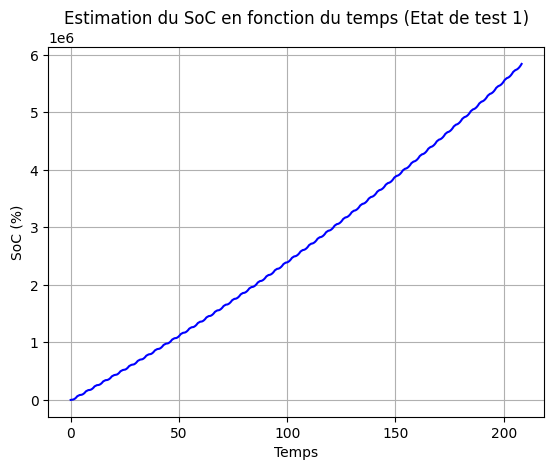

In [116]:
# Filtrer les données pour l'état de test 1
df_etat_1 = df[df['Etat_step'] == 1]

# Tracer le SoC en fonction du temps pour l'état de test 1
plt.plot(df_etat_1['t'], df_etat_1['soc'], color='blue')
plt.title('Estimation du SoC en fonction du temps (Etat de test 1)')
plt.xlabel('Temps')
plt.ylabel('SoC (%)')
plt.grid(True)
plt.show()

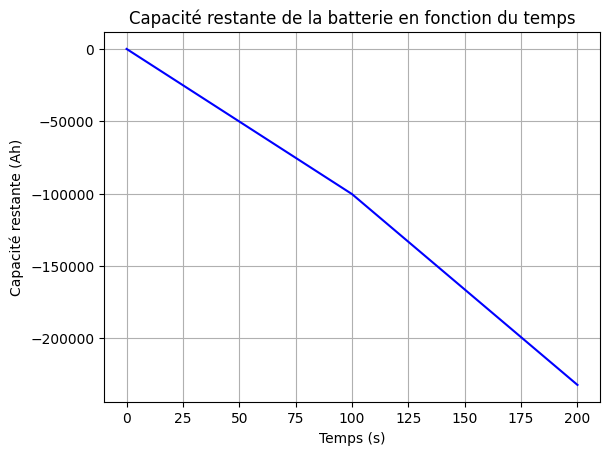

In [120]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # par exemple, en Ah

# Fonction pour calculer Q_remaining(t)
def calcul_q_remaining(df, temps):
    # Filtrer les données jusqu'au temps t
    df_temps = df[df['t'] <= temps]
    # Calculer la charge cumulée jusqu'au temps t
    charge_cumulee = df_temps['Ah'].sum()
    # Calculer Q_remaining(t)
    q_remaining = capacite_nominale_maximale - charge_cumulee
    return q_remaining

# Création d'une liste de temps pour lesquels nous voulons calculer Q_remaining(t)
temps = range(0, int(df['t'].max()), 100)  # Par exemple, de 0 à la valeur maximale de temps dans le dataframe, avec un pas de 100 secondes

# Calculer Q_remaining(t) pour chaque temps dans la liste
q_remaining_values = [calcul_q_remaining(df, t) for t in temps]

# Tracer Q_remaining(t)
plt.plot(temps, q_remaining_values, color='blue')
plt.title('Capacité restante de la batterie en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Capacité restante (Ah)')
plt.grid(True)
plt.show()


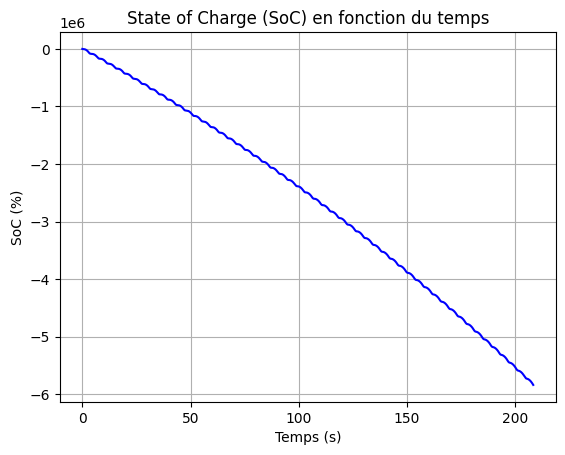

In [124]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # par exemple, en Ah

# Calculer la charge totale consommée jusqu'à chaque temps
df['charge_cumulee'] = df['Ah'].cumsum()

# Calculer la capacité restante de la batterie à chaque temps
df['q_remaining'] = capacite_nominale_maximale - df['charge_cumulee']

# Calculer le SoC à chaque temps
df['soc'] = (df['q_remaining'] / capacite_nominale_maximale) * 100

# Tracer le SoC en fonction du temps
plt.plot(df['t'], df['soc'], color='blue')
plt.title('State of Charge (SoC) en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('SoC (%)')
plt.grid(True)
plt.show()

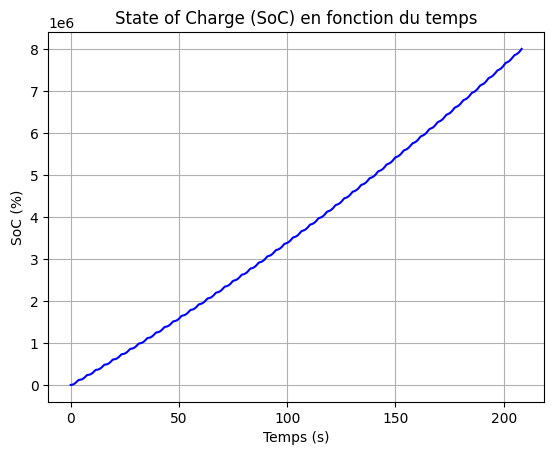

In [126]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # par exemple, en Ah

# Calculer la charge cumulée (intégration de la charge)
df['charge_cumulee'] = df['Ah_Charge'].cumsum()

# Calculer la décharge cumulée (intégration de la décharge)
df['decharge_cumulee'] = df['Ah_Discharge'].cumsum()

# Calculer la capacité cumulée (charge - décharge)
df['capacite_cumulee'] = df['charge_cumulee'] - df['decharge_cumulee']

# Calculer le SoC en fonction de la capacité cumulée
df['soc'] = (df['capacite_cumulee'] / capacite_nominale_maximale) * 100

# Tracer le SoC en fonction du temps
plt.plot(df['t'], df['soc'], color='blue')
plt.title('State of Charge (SoC) en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('SoC (%)')
plt.grid(True)
plt.show()


### Energie chargé et dechargé en fonction des cycles

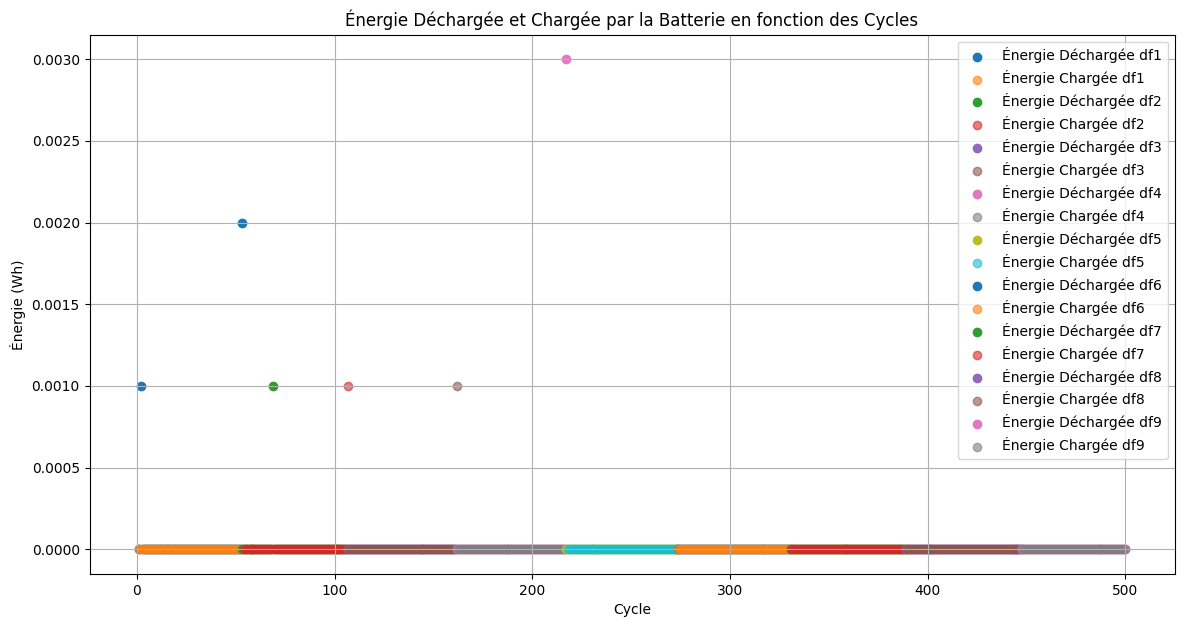

In [11]:
# Créer le graphique
plt.figure(figsize=(14, 7))

# Parcourir chaque DataFrame et tracer la différence d'énergie déchargée et chargée par cycle
for i in range(1, 10):
    df_key = f'df{i}'

    # Vérifier si le DataFrame existe dans le dictionnaire
    if df_key in dfs:
        # Calculer la différence d'énergie déchargée pour les cycles de décharge
        dfs[df_key].loc[dfs[df_key]['Etat_step'] == 2, 'Discharge_diff'] = dfs[df_key].loc[dfs[df_key]['Etat_step'] == 2, 'Ah_Discharge'].diff().fillna(0)
        
        # Calculer la différence d'énergie chargée pour les cycles de charge
        dfs[df_key].loc[dfs[df_key]['Etat_step'] == 1, 'Charge_diff'] = dfs[df_key].loc[dfs[df_key]['Etat_step'] == 1, 'Ah_Charge'].diff().fillna(0)
        
        # Tracer la différence d'énergie déchargée pour ce DataFrame
        # Group by cycle and take the last value (it should already be the cumulative value for that cycle)
        energy_discharged_per_cycle = dfs[df_key][dfs[df_key]['Etat_step'] == 2].groupby('CycleCnt01')['Discharge_diff'].last()
        plt.scatter(energy_discharged_per_cycle.index, energy_discharged_per_cycle.values, label=f'Énergie Déchargée {df_key}')

        # Tracer la différence d'énergie chargée pour ce DataFrame
        energy_charged_per_cycle = dfs[df_key][dfs[df_key]['Etat_step'] == 1].groupby('CycleCnt01')['Charge_diff'].last()
        plt.scatter(energy_charged_per_cycle.index, energy_charged_per_cycle.values, label=f'Énergie Chargée {df_key}', alpha=0.6)

# Ajouter des titres et des labels
plt.title('Énergie Déchargée et Chargée par la Batterie en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Énergie (Wh)')
plt.legend()
plt.grid(True)
plt.show()

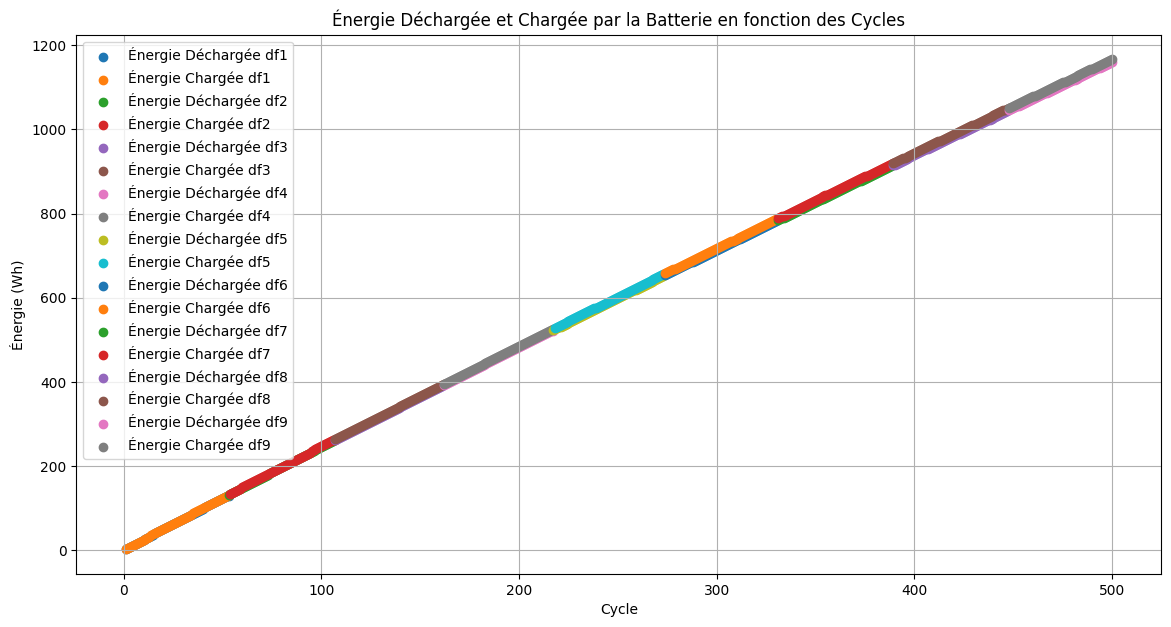

In [12]:
# Créer le graphique
plt.figure(figsize=(14, 7))

# Parcourir chaque DataFrame et tracer l'énergie déchargée et chargée par cycle
for i in range(1, 10):
    df_key = f'df{i}'
    
    # Vérifier si le DataFrame existe dans le dictionnaire
    if df_key in dfs:
        # Pour chaque cycle, obtenir la dernière valeur de Wh_Discharge pour les états de décharge (2)
        energy_discharged_per_cycle = dfs[df_key][dfs[df_key]['Etat_step'] == 2].groupby('CycleCnt01')['Ah_Discharge'].last()
        
        # Pour chaque cycle, obtenir la dernière valeur de Wh_Charge pour les états de charge (1)
        energy_charged_per_cycle = dfs[df_key][dfs[df_key]['Etat_step'] == 1].groupby('CycleCnt01')['Ah_Charge'].last()

        # Tracer l'énergie déchargée et chargée pour ce DataFrame
        plt.scatter(energy_discharged_per_cycle.index, energy_discharged_per_cycle.values, label=f'Énergie Déchargée {df_key}')
        plt.scatter(energy_charged_per_cycle.index, energy_charged_per_cycle.values, label=f'Énergie Chargée {df_key}')

# Ajouter des titres et des labels
plt.title('Énergie Déchargée et Chargée par la Batterie en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Énergie (Wh)')
plt.legend()
plt.grid(True)
plt.show()

### Rendement énergétique

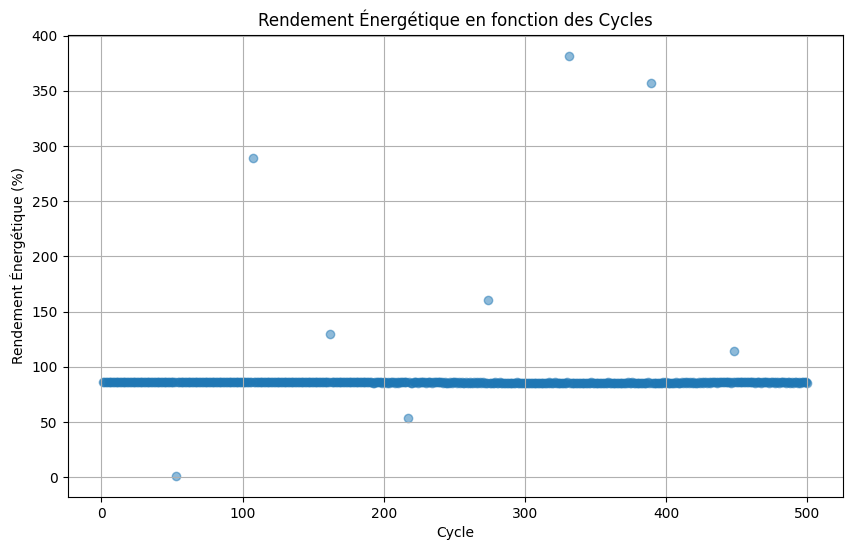

In [14]:
#Initialiser les listes pour stocker les données agrégées
cycles_tous = []
rendement_tous = []

# Boucle pour calculer le rendement énergétique pour chaque cycle dans tous les DataFrames
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:  # Vérifiez si le DataFrame existe dans le dictionnaire
        # Filtrer les données pour les cycles de décharge et de charge
        df_discharge = dfs[df_key][dfs[df_key]['Etat_step'] == 2].copy()
        df_charge = dfs[df_key][dfs[df_key]['Etat_step'] == 1].copy()
        
        # Calculer l'énergie déchargée et chargée par cycle
        df_discharge['Energie_diff'] = df_discharge['Wh_Discharge'].diff().fillna(0)
        df_charge['Energie_diff'] = df_charge['Wh_Charge'].diff().fillna(0)
        
        # Calculer le rendement énergétique par cycle
        for cycle in set(df_discharge['CycleCnt01']).intersection(set(df_charge['CycleCnt01'])):
            energie_discharge = df_discharge[df_discharge['CycleCnt01'] == cycle]['Energie_diff'].sum()
            energie_charge = df_charge[df_charge['CycleCnt01'] == cycle]['Energie_diff'].sum()
            if energie_charge > 0:  # Éviter la division par zéro
                rendement = (energie_discharge / energie_charge) * 100
                cycles_tous.append(cycle)
                rendement_tous.append(rendement)

# Tracer le rendement énergétique pour tous les cycles et DataFrames sur un seul graphique
plt.figure(figsize=(10, 6))
plt.scatter(cycles_tous, rendement_tous, alpha=0.5)
plt.title('Rendement Énergétique en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Rendement Énergétique (%)')
plt.grid(True)
plt.show()

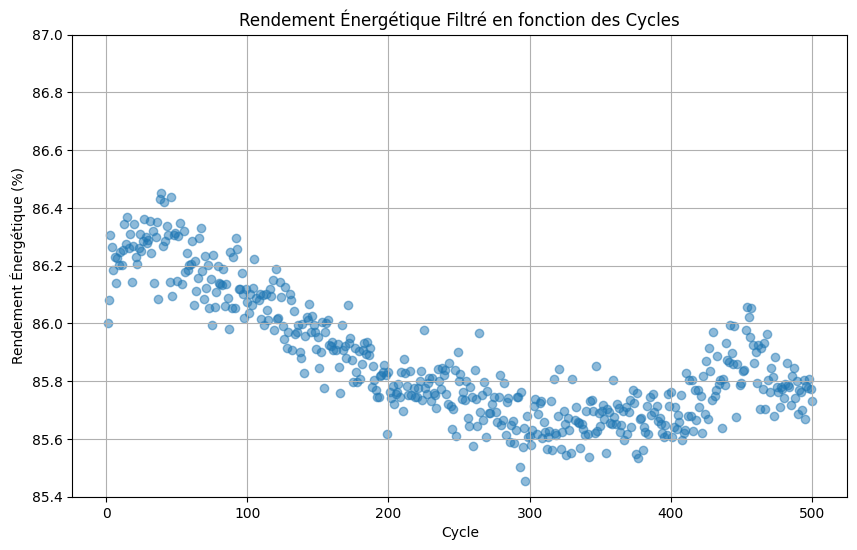

In [30]:
# Initialiser les listes pour stocker les données agrégées
cycles_filtres = []
rendement_filtres = []

# Utiliser les valeurs précédemment calculées : cycles_tous, rendement_tous
# Filtrer pour inclure uniquement les valeurs de rendement entre 50 et 100
for cycle, rendement in zip(cycles_tous, rendement_tous):
    if 85 <= rendement <= 90:
        cycles_filtres.append(cycle)
        rendement_filtres.append(rendement)

# Tracer le rendement énergétique filtré pour tous les cycles sur un seul graphique
plt.figure(figsize=(10, 6))
plt.scatter(cycles_filtres, rendement_filtres, alpha=0.5)
plt.title('Rendement Énergétique Filtré en fonction des Cycles')
plt.xlabel('Cycle')
plt.ylabel('Rendement Énergétique (%)')
plt.grid(True)
plt.ylim(85.4, 87)  
plt.show()

### Temperature

In [29]:
# Initialiser un DataFrame pour rassembler les données de température moyenne par cycle pour tous les df
temp_means_by_cycle = pd.DataFrame()

# Parcourir chaque df
for i in range(1, 10):
    df_key = f'df{i}'
    if df_key in dfs:
        # Calculer la moyenne de la température par cycle dans le DataFrame actuel
        temp_means_by_cycle_i = pd.DataFrame()  # Créer un DataFrame temporaire pour stocker les moyennes de ce DataFrame spécifique
        for col in temp_columns:
            # Calculer la moyenne pour la colonne actuelle et le DataFrame actuel
            temp_mean = dfs[df_key].groupby('CycleCnt01')[col].mean()
            
            # Ajouter une colonne pour cette température moyenne dans le DataFrame temporaire
            temp_means_by_cycle_i[col] = temp_mean
        
        # Concaténer les moyennes calculées de ce DataFrame à temp_means_by_cycle
        temp_means_by_cycle = pd.concat([temp_means_by_cycle, temp_means_by_cycle_i], axis=1)

# Tracer les courbes des températures moyennes à travers tous les DataFrames
for col in temp_columns:
    plt.plot(temp_means_by_cycle[col], marker='o', linestyle='-', label=col)

# Configurer le titre et les légendes
plt.title('Moyenne des Températures par Cycle de Charge à travers tous les DFs')
plt.xlabel('Cycle de Charge Cumulatif')
plt.ylabel('Température Moyenne (°C)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'temp_columns' is not defined

ValueError: x and y must have same first dimension, but have shapes (208303,) and (1,)

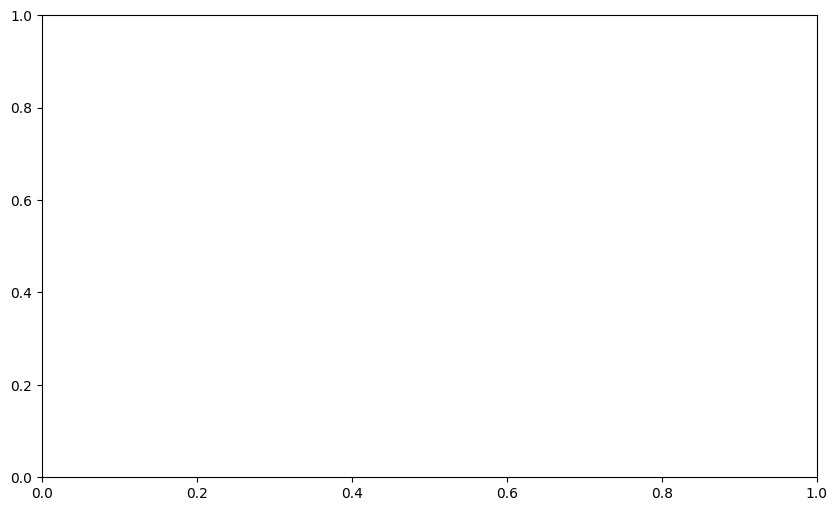

In [118]:
def estimer_soc(df):
    dt = df['t'].diff()  # Calculer la différence de temps entre les échantillons
    charge_in = (df['Ah'] > 0) * df['Ah'] * dt  # Calculer la charge entrante (courant positif)
    charge_out = (df['Ah'] < 0) * df['Ah'] * dt  # Calculer la charge sortante (courant négatif)
    soc = (charge_in.sum() - charge_out.sum()) / (3600 * 4.2) * 100  # SOC en pourcentage
    return soc

# Estimer le SOC à partir du dataframe
soc_estime = estimer_soc(df)

# Tracer le graphe SOC en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df['t'], soc_estime)
plt.title('Estimation du SOC en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('SOC (%)')
plt.grid(True)
plt.show()

In [33]:
# Créer une liste pour stocker les résultats des modèles
resultats = []

# Répéter l'opération pour 10 échantillons
for i in range(10):
    # Extraire un échantillon de taille 1000
    echantillon = df.sample(n=1000, random_state=i)
    
    # Diviser l'échantillon en features (X) et la cible (y)
    X = echantillon[['t']]
    y = echantillon['BMS_Tension_A']
    
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer un objet de modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Coefficients de régression
    coefficients = model.coef_
    
    # Erreur quadratique moyenne
    mse = mean_squared_error(y_test, y_pred)
    
    # Coefficient de détermination (R²)
    r2 = r2_score(y_test, y_pred)
    
    # Ajouter les résultats à la liste
    resultats.append({'Coefficients': coefficients, 'MSE': mse, 'R2': r2})

# Afficher les résultats
for i, resultat in enumerate(resultats):
    print(f"Résultats pour l'échantillon {i+1}:")
    print("Coefficients de régression:", resultat['Coefficients'])
    print("Mean Squared Error:", resultat['MSE'])
    print("Coefficient of Determination (R²):", resultat['R2'])
    print("\n")

# Faire une conclusion basée sur les résultats obtenus
# Vous pouvez comparer les performances des différents modèles et tirer des conclusions sur la fiabilité des prédictions.

Résultats pour l'échantillon 1:
Coefficients de régression: [0.00078036]
Mean Squared Error: 1.7278553068237779
Coefficient of Determination (R²): -0.011984684204021212


Résultats pour l'échantillon 2:
Coefficients de régression: [-0.00023288]
Mean Squared Error: 2.1370166788306246
Coefficient of Determination (R²): -0.008730579735941602


Résultats pour l'échantillon 3:
Coefficients de régression: [0.00010845]
Mean Squared Error: 2.133547691151422
Coefficient of Determination (R²): -0.007088969994423655


Résultats pour l'échantillon 4:
Coefficients de régression: [-0.00067684]
Mean Squared Error: 1.8743236031850194
Coefficient of Determination (R²): -0.004213344305222355


Résultats pour l'échantillon 5:
Coefficients de régression: [-0.00074846]
Mean Squared Error: 2.0554791095494567
Coefficient of Determination (R²): -0.00788386468400426


Résultats pour l'échantillon 6:
Coefficients de régression: [0.00039653]
Mean Squared Error: 1.744602555238089
Coefficient of Determination (R²)

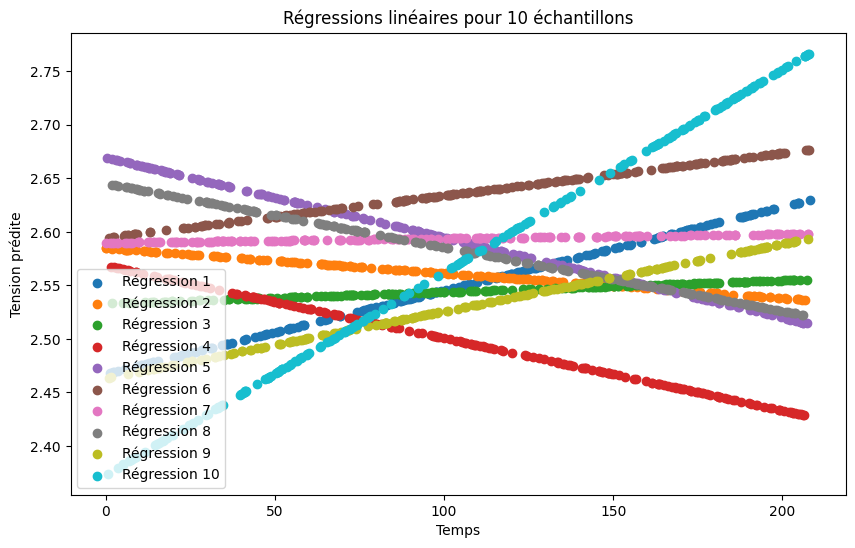

In [40]:
# Créer une liste pour stocker les résultats des modèles
resultats = []

# Créer une figure pour le tracé
plt.figure(figsize=(10, 6))

# Répéter l'opération pour 10 échantillons
for i in range(10):
    # Extraire un échantillon de taille 1000
    echantillon = df.sample(n=1000, random_state=i)
    
    # Diviser l'échantillon en features (X) et la cible (y)
    X = echantillon[['t']]
    y = echantillon['BMS_Tension_A']
    
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer un objet de modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Ajouter les résultats à la liste
    resultats.append({'t': X_test.values.flatten(), 'Tension_predite': y_pred})

# Tracer les résultats de toutes les régressions
for i, resultat in enumerate(resultats):
    temps = resultat['t']
    tension_predite = resultat['Tension_predite']
    plt.scatter(temps, tension_predite, label=f'Régression {i+1}')

# Ajouter une légende et des labels d'axes
plt.xlabel('Temps')
plt.ylabel('Tension prédite')
plt.title('Régressions linéaires pour 10 échantillons')
plt.legend()
plt.show()

In [ ]:
# Fonction pour modéliser la chute de tension lors de la décharge de la batterie
def drop_tension(t, Ri, Voc):
    return Voc - Ri * t

# Fonction pour estimer la résistance interne pour un intervalle de temps donné avec un courant de décharge négatif
def estimer_resistance_interne_interval(df_interval):
    # Sélectionner les données de décharge avec un courant négatif
    df_decharge = df_interval[df_interval['Ah'] < 0]
    
    # Estimer la résistance interne en ajustant la courbe à l'aide de la méthode des moindres carrés
    popt, _ = curve_fit(drop_tension, df_decharge['t'], df_decharge['BMS_Tension_A'])
    resistance_interne = popt[0]  # Le premier élément de popt est la résistance interne estimée
    
    return resistance_interne

# Fonction pour diviser les données de décharge en intervalles de temps et estimer la résistance interne pour chaque intervalle
def estimer_resistance_interne_dynamique(df, num_intervals=10):
    # Diviser les données en intervalles de temps égaux
    interval_length = len(df) // num_intervals
    intervals = [df.iloc[i*interval_length:(i+1)*interval_length] for i in range(num_intervals)]
    
    # Estimer la résistance interne pour chaque intervalle
    resistances = [estimer_resistance_interne_interval(interval) for interval in intervals]
    
    return resistances
# Appeler la fonction pour estimer la résistance interne dynamique
resistances_dynamiques = estimer_resistance_interne_dynamique(df_decharge)

# Afficher les estimations de résistance interne pour chaque intervalle de temps
print("Estimations de la résistance interne pour chaque intervalle de temps :")
for i, resistance in enumerate(resistances_dynamiques):
    print(f"Intervalle {i+1}: {resistance} Ohms")


# Appeler la fonction pour estimer la résistance interne dynamique
resistances_dynamiques = estimer_resistance_interne_dynamique(df_decharge)

# Créer une liste des temps de début de chaque intervalle
temps_debut_intervalles = [interval['Temps'].iloc[0] for interval in intervals]

# Tracer le graphique de la résistance en fonction du temps
plt.plot(temps_debut_intervalles, resistances_dynamiques, marker='o')
plt.xlabel('Temps (s)')
plt.ylabel('Résistance interne (Ohms)')
plt.title('Résistance interne de la batterie en fonction du temps de décharge')
plt.grid(True)
plt.show()

test

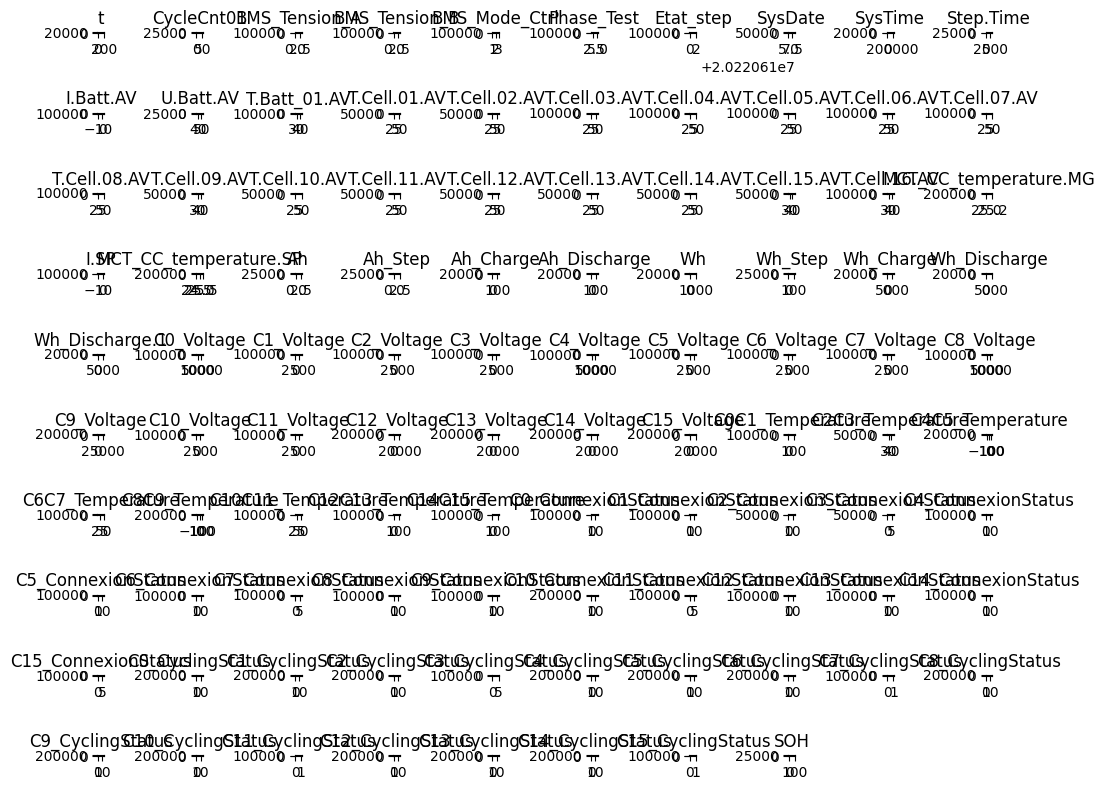

In [74]:
# Histogrammes
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


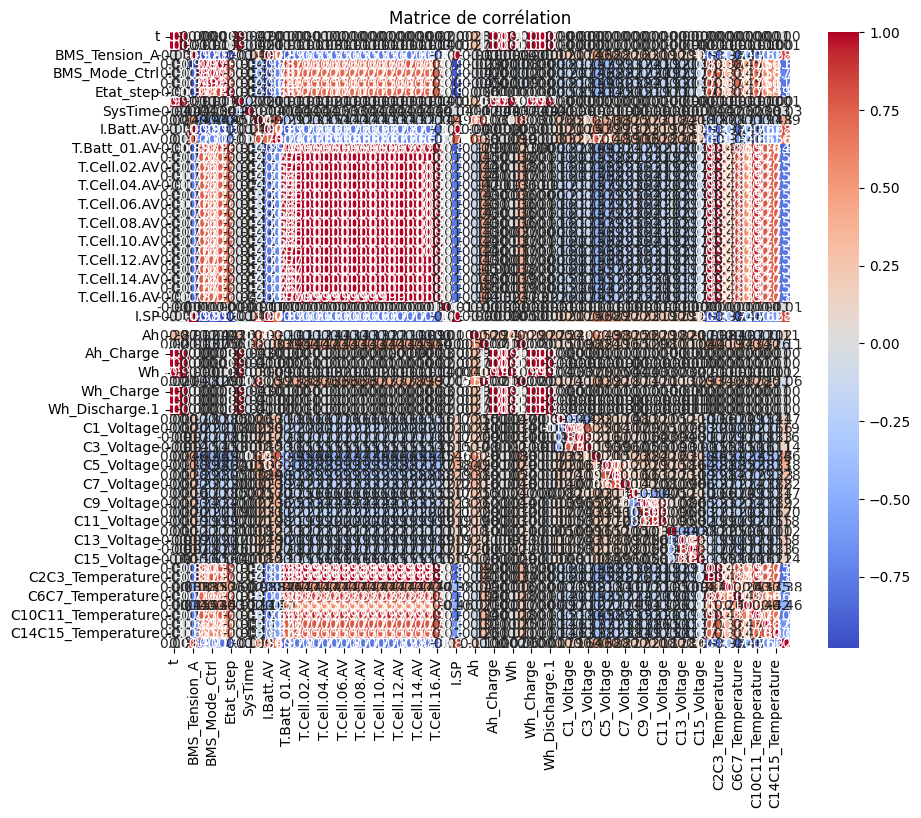

In [75]:
# Calculer la matrice de corrélation
# Sélectionner uniquement les colonnes à inclure dans la matrice de corrélation
colonnes_a_inclure = df.columns[:-32]

# Calculer la matrice de corrélation en utilisant les colonnes sélectionnées
correlation_matrix = df[colonnes_a_inclure].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()